# Module 8 Exercises - Logistic Regression

### Exercise 1:

[Download the diabetes.csv file](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/datasets) and load it in as a dataframe. Narrow your dataset to include columns and/or rows that best predicts the outcome of if a patient will get diabetes.

In [1]:
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [9]:
location = ("datasets/diabetes.csv")
df = pd.read_csv("datasets/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


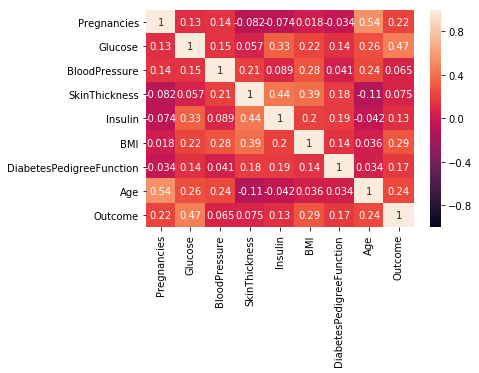

In [19]:
corr= df.corr()
sns.heatmap(corr, vmin=-1, annot=True)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.shape

(768, 9)

In [17]:
import seaborn as sns 

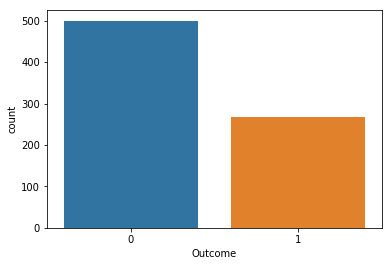

In [21]:
sns.countplot(x='Outcome', data=df)

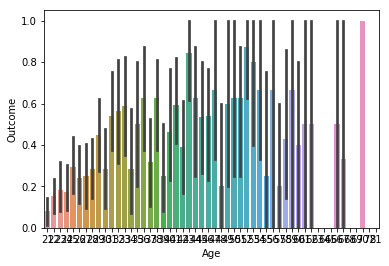

In [23]:
sns.barplot('Age','Outcome', data=df)

In [24]:
df['Age'].dtypes

dtype('int64')

In [27]:
bins=[0,25,45,65,85,100]
group_names=['A','B','C','D','E']
df['AgeGroups']=pd.cut(df['Age'], bins, labels=group_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroups
0,6,148,72,35,0,33.6,0.627,50,1,C
1,1,85,66,29,0,26.6,0.351,31,0,B
2,8,183,64,0,0,23.3,0.672,32,1,B
3,1,89,66,23,94,28.1,0.167,21,0,A
4,0,137,40,35,168,43.1,2.288,33,1,B


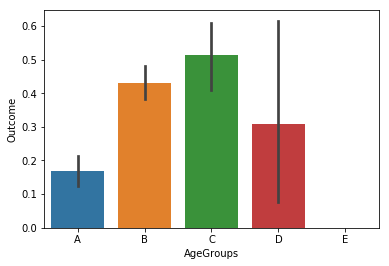

In [29]:
sns.barplot('AgeGroups','Outcome', data=df)

In [ ]:
#Highest age group is from age 45 to 65

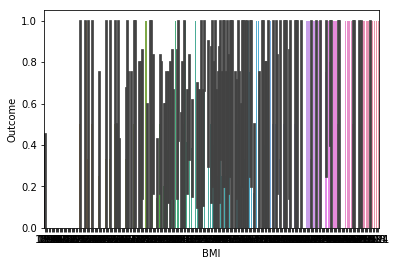

In [30]:
sns.barplot('BMI','Outcome', data=df)

### Exercise 2:

Using the dataframe in the exercise above, split the dataset into training and testing. Use the default 25% test setting.

In [34]:
modeldf= df.drop(['BloodPressure','SkinThickness'], axis = 1)

In [35]:
modeldf.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome', 'AgeGroups'],
      dtype='object')

In [40]:
y = modeldf['Outcome']

In [41]:
X=modeldf.drop(['Outcome'], axis=1)

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.25, random_state=15)

In [44]:
LogReg= logisticRegression()
LogReg.fit(X_train, y_train)

NameError: name 'logisticRegression' is not defined

### Exercise 3:

Using the logistic regression function in the scikit-learn library (sklearn), fit the model with the training dataset. Then score the model for training; how well did it do?

### Exercise 4:

Now use the test dataset on the logistic regression function and get its score.

### Exercise 5:

Make a confusion matrix for the predicted outcomes to compare it against the "true" outcomes. How many values for each outcome did the model get incorrect?

### Exercise 6:

Get a classification report on the model for the predicted data. Which outcome is the model more accurate at predicting?